In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Dataset/project home credit/application.csv')
print(df.shape)  # Harusnya (307511, ...) kalau full

(307511, 16)


In [ ]:
df.info()

# **Missing Value**

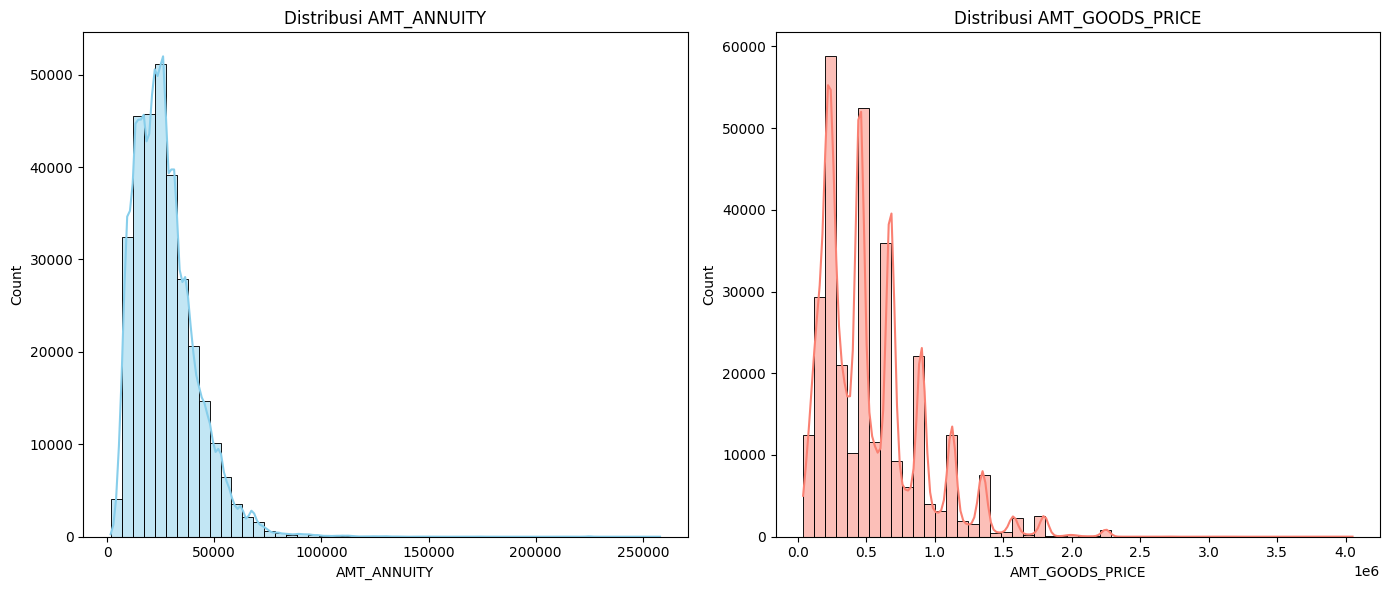

In [ ]:
plt.figure(figsize=(14, 6))

# AMT_ANNUITY
plt.subplot(1, 2, 1)
sns.histplot(df['AMT_ANNUITY'].dropna(), kde=True, bins=50, color='skyblue')
plt.title('Distribusi AMT_ANNUITY')
plt.xlabel('AMT_ANNUITY')

# AMT_GOODS_PRICE
plt.subplot(1, 2, 2)
sns.histplot(df['AMT_GOODS_PRICE'].dropna(), kde=True, bins=50, color='salmon')
plt.title('Distribusi AMT_GOODS_PRICE')
plt.xlabel('AMT_GOODS_PRICE')

plt.tight_layout()
plt.show()

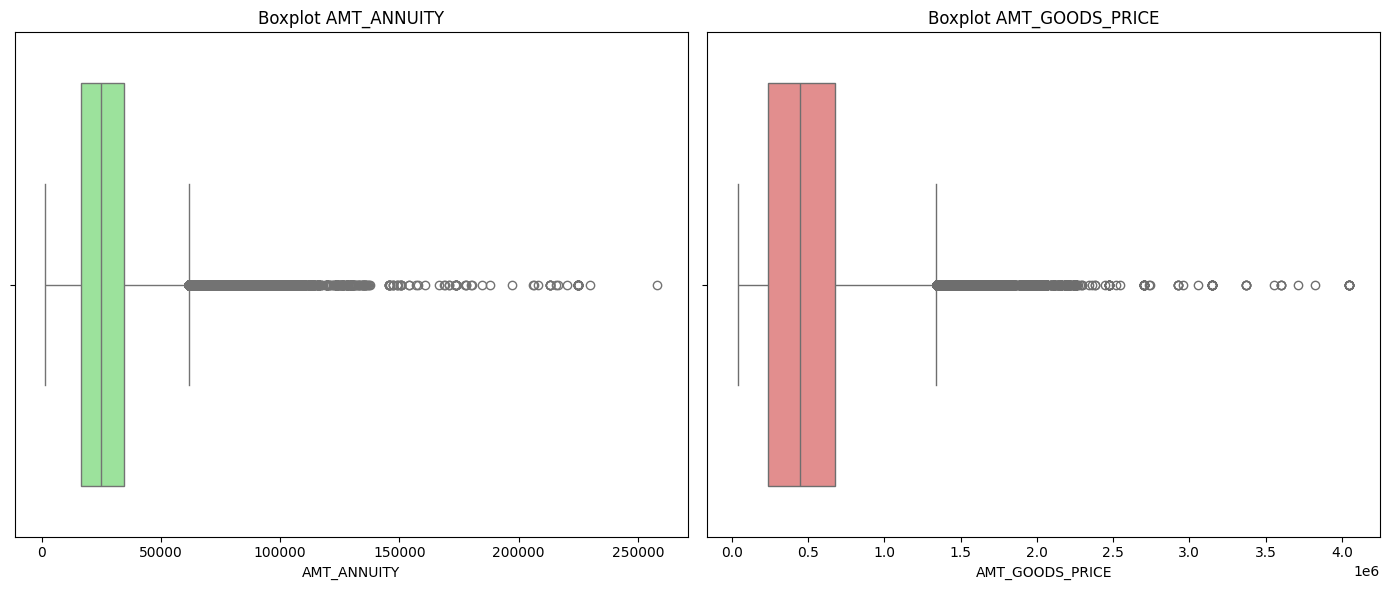

In [ ]:
plt.figure(figsize=(14, 6))

# Boxplot AMT_ANNUITY
plt.subplot(1, 2, 1)
sns.boxplot(x=df['AMT_ANNUITY'], color='lightgreen')
plt.title('Boxplot AMT_ANNUITY')

# Boxplot AMT_GOODS_PRICE
plt.subplot(1, 2, 2)
sns.boxplot(x=df['AMT_GOODS_PRICE'], color='lightcoral')
plt.title('Boxplot AMT_GOODS_PRICE')

plt.tight_layout()
plt.show()

In [ ]:
df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median())
df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median())

/tmp/ipython-input-2159043048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NAME_TYPE_SUITE', order=df['NAME_TYPE_SUITE'].value_counts().index, palette='viridis')


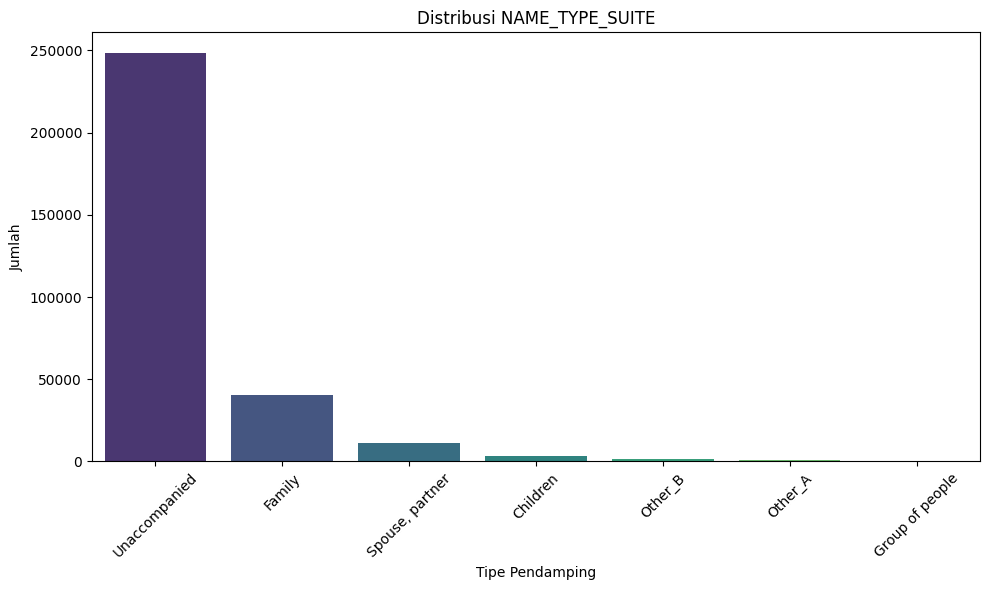

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NAME_TYPE_SUITE', order=df['NAME_TYPE_SUITE'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribusi NAME_TYPE_SUITE')
plt.xlabel('Tipe Pendamping')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

In [ ]:
mode_suite = df['NAME_TYPE_SUITE'].mode()[0]
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna(mode_suite)

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': (missing / len(df)) * 100
})

missing_df.head(20)

,Missing Count,Missing %


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307511 non-null  float64
 10  AMT_GOODS_PRICE      307511 non-null  float64
 11  NAME_TYPE_SUITE      307511 non-null  object 
 12  NAME_INCOME_TYPE     307511 non-null  object 
 13  NAME_EDUCATION_TYPE  307511 non-null  object 
 14  NAME_FAMILY_STATUS   307511 non-null  object 
 15  NAME_HOUSING_TYPE

In [ ]:
# **duplication check**

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.duplicated(subset=['SK_ID_CURR']).sum()


np.int64(0)

# **Save gdrive**

In [ ]:
df.to_csv('clean_home_credit.csv', index=False)

In [ ]:
df.to_csv('/content/drive/My Drive/Dataset/project home credit/application_clean.csv', index=False)